### plot individual fitted parameters

In [19]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
df = pd.read_csv('./params/fmri.csv')

In [159]:
df['subject'] = np.tile(np.arange(35),len(np.unique(df['model'])))

In [49]:
def sig(x):
    return 1./(1.+np.exp(-x))

In [50]:
np.unique(df['model'])

array(['random', 'rw', 'subjects_io_fixed_freq',
       'subjects_io_fixed_trans', 'subjects_io_jump_freq',
       'subjects_io_jump_trans', 'wsls'], dtype=object)

In [171]:
df['parameters_transformed'] = df['parameters'].apply(sig)

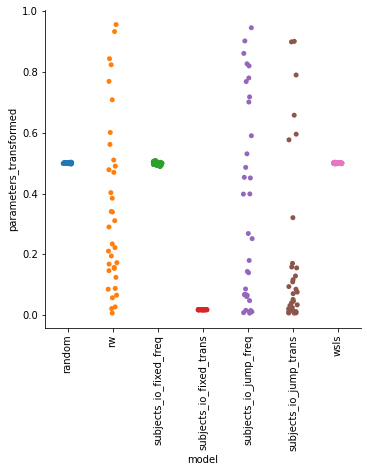

In [172]:
g = sns.catplot(data=df, x='model', y='parameters_transformed')
g.set_xticklabels(rotation=90)

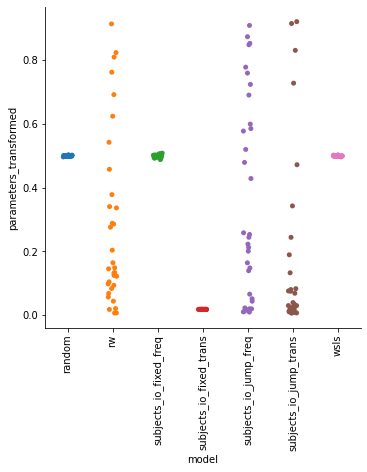

In [42]:
df = pd.read_csv('./params/practice.csv')
df['parameters_transformed'] = df['parameters'].apply(sig)
g = sns.catplot(data=df, x='model', y='parameters_transformed')
g.set_xticklabels(rotation=90)

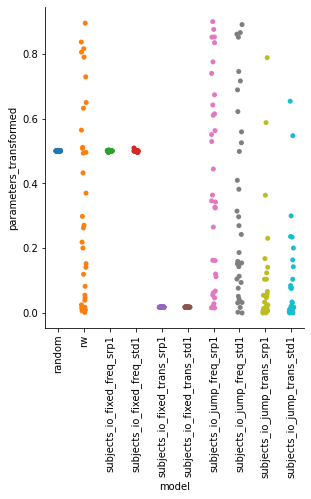

In [43]:
df = pd.read_csv('./params/practice_rt.csv')
df['parameters_transformed'] = df['parameters'].apply(sig)
g = sns.catplot(data=df, x='model', y='parameters_transformed')
g.set_xticklabels(rotation=90)

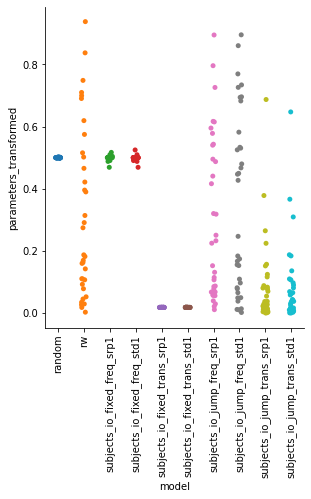

In [41]:
df = pd.read_csv('./params/fmri_rt.csv')
df['parameters_transformed'] = df['parameters'].apply(sig)
g = sns.catplot(data=df, x='model', y='parameters_transformed')
g.set_xticklabels(rotation=90)

In [173]:
df_model = pd.read_csv('../vba/local_output/subject_fmri.csv')

In [174]:
df_model.head()

,rw,subjects_io_jump_freq
0,6.495508e-02,0.935045
1,1.576723e-16,1.000000
2,5.893816e-07,0.999999
3,1.892668e-07,1.000000
4,7.662771e-05,0.999923


In [175]:
df_model.mean().round(2)

rw                       0.36
subjects_io_jump_freq    0.64
dtype: float64

In [195]:
df = pd.read_csv('./params/fmri.csv')
df['parameters_transformed'] = df['parameters'].apply(sig)
df['subject'] = np.tile(np.arange(35),len(np.unique(df['model'])))

In [196]:
df_model[df_model['subjects_io_jump_freq']>df_model['rw']].index.shape

(22,)

In [197]:
df_model[df_model['subjects_io_jump_freq']<=df_model['rw']].index.shape

(13,)

In [198]:
sj_io = df_model[df_model['subjects_io_jump_freq']>df_model['rw']].index.to_list()

In [199]:
sj_rw = df_model[df_model['subjects_io_jump_freq']<=df_model['rw']].index.to_list()

In [200]:
df_rwio = pd.concat([df[df['model']=='rw'], df[df['model']=='subjects_io_jump_freq']])

In [201]:
df_rwio

,model,log_evidence,parameters,parameters_transformed,subject
35,rw,174.013026,-1.184415,0.234259,0
36,rw,139.524618,0.247402,0.561537,1
37,rw,169.511040,-1.680025,0.157092,2
38,rw,168.146916,-0.470156,0.384579,3
39,rw,157.677209,-2.654845,0.065691,4
...,...,...,...,...,...
170,subjects_io_jump_freq,161.297254,-0.411092,0.398650,30
171,subjects_io_jump_freq,198.580367,-2.635108,0.066913,31
172,subjects_io_jump_freq,138.738194,-4.786019,0.008277,32
173,subjects_io_jump_freq,184.403594,-0.413175,0.398151,33


In [202]:
io_status = pd.concat([df_model['subjects_io_jump_freq']>df_model['rw'].values,df_model['subjects_io_jump_freq']>df_model['rw'].values])

In [203]:
df_rwio['io_status'] = io_status.values

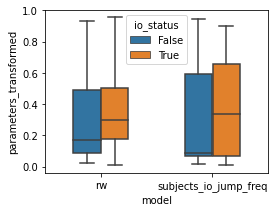

In [226]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(data=df_rwio, x='model', y='parameters_transformed', hue='io_status', ax=ax, width=0.5)
fig_path = os.path.join('figs','params_group.pdf')
plt.savefig(fig_path, bbox_inches='tight')

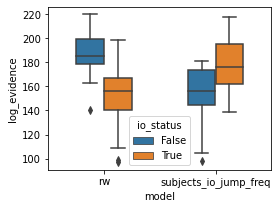

In [227]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(data=df_rwio, x='model', y='log_evidence', hue='io_status', ax=ax, width=0.5)
fig_path = os.path.join('figs','log_evidence.pdf')
plt.savefig(fig_path, bbox_inches='tight')

In [206]:
dfio = df_rwio[df_rwio['model']=='subjects_io_jump_freq']

In [209]:
dfio_t=dfio[dfio['io_status']==True]['parameters_transformed']
dfio_f=dfio[dfio['io_status']==False]['parameters_transformed']

In [210]:
from scipy.stats import ttest_ind

In [211]:
ttest_ind(dfio_t, dfio_f)

Ttest_indResult(statistic=0.4442541972522644, pvalue=0.6597586208780065)

In [212]:
dfrw = df_rwio[df_rwio['model']=='rw']
dfrw_t=dfrw[dfrw['io_status']==True]['parameters_transformed']
dfrw_f=dfrw[dfrw['io_status']==False]['parameters_transformed']

In [213]:
ttest_ind(dfrw_t, dfrw_f)

Ttest_indResult(statistic=0.2950148826113631, pvalue=0.7698306469437093)

In [214]:
import scipy

def plot_bins(df,sj_idx=None,cut_num=10,model=None):
    """bin average then correlate"""
    fig, ax = plt.subplots(figsize=(4,4))
    all_sj = np.unique(df['subject'])
    if sj_idx is not None:
        sj_ls = all_sj[sj_idx]
    else:
        sj_ls = all_sj
    n_sj = len(sj_ls)
    r_sj = np.empty((n_sj,))
    model_sj = np.empty((n_sj, cut_num))
    rate_sj = np.empty((n_sj, cut_num))



#     for idx, sj in enumerate(np.unique(df['subject'])):
    for idx, sj in enumerate(sj_ls):
        df_sj = df[df['subject']==sj]
        df_tmp = df_sj.dropna(subset=['p1'])
        model_rank = df_tmp['pmod'].rank(method='max')
        model_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['pmod'].mean().values
        rate_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['p1'].mean().values
        nas = np.logical_and(np.isnan(model_cut), np.isnan(rate_cut)) # get rid of nans
        # demean
#         mc_dm = demean(model_cut[~nas])
#         rc_dm = demean(rate_cut[~nas])
#         pr, pv = scipy.stats.pearsonr(mc_dm, rc_dm)
#         sns.regplot(x=mc_dm, y=rc_dm)
        # no demean
#         print(f'subject %d, pearsonr %.3f, pval %.3f' %(sj, pr, pv))
        pr, pv = scipy.stats.pearsonr(model_cut[~nas], rate_cut[~nas])
        sns.regplot(x=model_cut[~nas], y=rate_cut[~nas])      
        
        r_sj[idx] = pr
        model_sj[idx,:] = model_cut
        rate_sj[idx,:] = rate_cut


    ax.set_aspect('equal')#, adjustable='box')
    plt.plot([0,1],[0,1], 'k-')
#     plt.xlim(-2.2,2.2)
#     plt.ylim(-2.2,2.2)
    # plt.xlim(0.,1)
    # plt.ylim(0.,1)
    plt.xlabel('Bayes-optimal model probability')
    plt.ylabel('Participant rated probability')
    t0, p0 = scipy.stats.ttest_rel(r_sj,np.zeros((n_sj,)))
    plt.title(f'Pearson r={np.mean(r_sj):.3f} (t({len(r_sj)})={t0:.3f}, p={p0:.3e})')
    if model is not None:
        fig_name = f'bins_{model:s}.pdf'
        fig_path = os.path.join('figs',fig_name)
        plt.savefig(fig_path, bbox_inches='tight')

def demean(df):
    """demean"""
    df_dm = (df-np.mean(df))/np.std(df)
    return df_dm

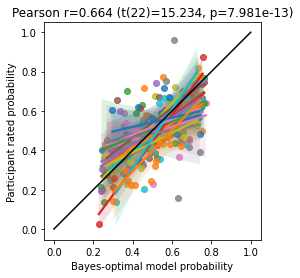

In [217]:
df_pmod = pd.read_csv('./output/fmri_io_jump_freq.csv')
io_idx = dfio[dfio['io_status']==True]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)

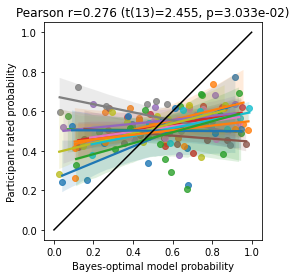

In [223]:
df_pmod = pd.read_csv('./output/fmri_rw.csv')
io_idx = dfio[dfio['io_status']==False]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)

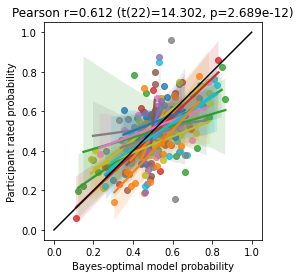

In [219]:
df_pmod = pd.read_csv('./local_output/fmri_subjects_io_jump_freq.csv')
io_idx = dfio[dfio['io_status']==True]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)

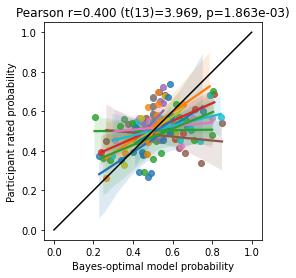

In [220]:
io_idx = dfio[dfio['io_status']==False]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)

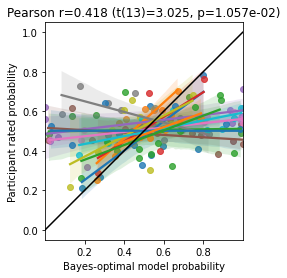

In [221]:
df_pmod = pd.read_csv('./local_output/fmri_rw.csv')
io_idx = dfio[dfio['io_status']==False]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)

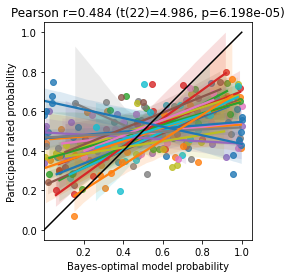

In [222]:
io_idx = dfio[dfio['io_status']==True]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)